<a href="https://colab.research.google.com/github/alwaysalearner1234/deep_learning/blob/main/neural_network_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Load dataset from UCI or local CSV
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data"

# Column names
columns = ['Sex', 'Length', 'Diameter', 'Height', 'WholeWeight',
           'ShuckedWeight', 'VisceraWeight', 'ShellWeight', 'Rings']

df = pd.read_csv(url, names=columns)

# Convert categorical 'Sex' to numeric
df = pd.get_dummies(df, columns=['Sex'], drop_first=True)

# Split into features and target
X = df.drop('Rings', axis=1)
y = df['Rings']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print("R² Score:", r2_score(y_test, y_pred))


R² Score: 0.5481628137889265


Implement Neural Network (or Logistic Regression) From Scratch





Predicting if a person would buy life insurnace based on his age using logistic regression
Above is a binary logistic regression problem as there are only two possible outcomes (i.e. if person buys insurance or he/she doesn't).

In [47]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [48]:
df = pd.read_csv("insurance_data.csv")
df.head()

,age,affordibility,bought_insurance
0,22,1,0
1,25,0,0
2,47,1,1
3,52,0,0
4,46,1,1



Split train and test set

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[['age','affordibility']],df.bought_insurance,test_size=0.2, random_state=25)

Preprocessing: Scale the data so that both age and affordibility are in same scaling range

In [50]:
X_train_scaled = X_train.copy()
X_train_scaled['age'] = X_train_scaled['age'] / 100

X_test_scaled = X_test.copy()
X_test_scaled['age'] = X_test_scaled['age'] / 100

Model Building: First build a model in keras/tensorflow and see what weights and bias values it comes up with. We will than try to reproduce same weights and bias in our plain python implementation of gradient descent. Below is the architecture of our simple neural network

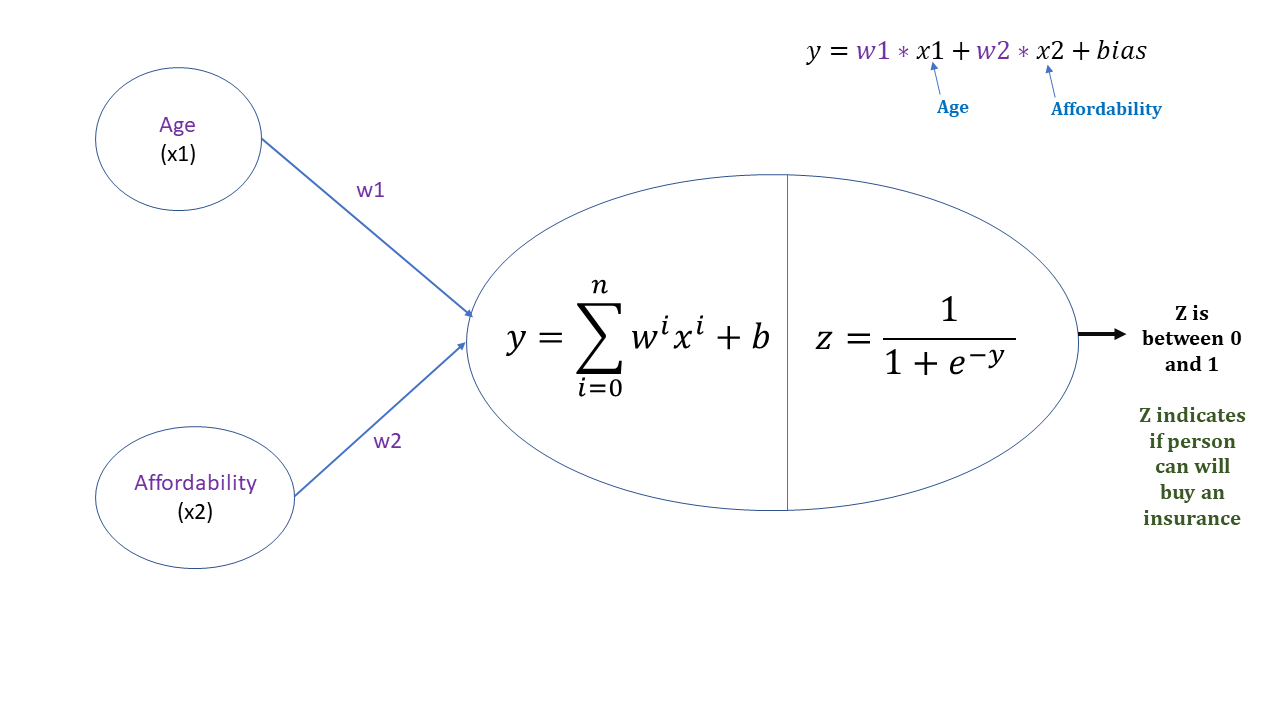

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(1, input_shape=(2,), activation='sigmoid', kernel_initializer='ones', bias_initializer='zeros')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=5000)

Epoch 1/5000


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 629ms/step - accuracy: 0.5000 - loss: 0.7113
Epoch 2/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.5000 - loss: 0.7110
Epoch 3/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.5000 - loss: 0.7106
Epoch 4/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.5000 - loss: 0.7102
Epoch 5/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.5000 - loss: 0.7098
Epoch 6/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.5000 - loss: 0.7094
Epoch 7/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.5000 - loss: 0.7091
Epoch 8/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.5000 - loss: 0.7087
Epoch 9/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.5000 - loss: 0.7083
Epoch 10/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.5000 - loss: 0.7079
Epoch 11/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.5000 - loss: 0.7076
Epoch 12/5000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.5000 - lo

Evaluate the model on test set

In [ ]:
model.evaluate(X_test_scaled,y_test)

In [ ]:
model.predict(X_test_scaled)


In [ ]:
y_test


Now get the value of weights and bias from the model

In [ ]:
coef, intercept = model.get_weights()


In [ ]:

coef, intercept

his means w1=5.060867, w2=1.4086502, bias =-2.9137027

In [ ]:
def sigmoid(x):
        import math
        return 1 / (1 + math.exp(-x))
sigmoid(18)


In [ ]:
X_test

Instead of model.predict, write our own prediction function that uses w1,w2 and bias

In [ ]:
def prediction_function(age, affordibility):
    weighted_sum = coef[0]*age + coef[1]*affordibility + intercept
    return sigmoid(weighted_sum)

prediction_function(.47, 1)

In [ ]:
prediction_function(.18, 1)


Now we start implementing gradient descent in plain python. Again the goal is to come up with same w1, w2 and bias that keras model calculated. We want to show how keras/tensorflow would have computed these values internally using gradient descent

First write couple of helper routines such as sigmoid and log_loss

In [ ]:
def sigmoid_numpy(X):
   return 1/(1+np.exp(-X))

sigmoid_numpy(np.array([12,0,1]))


In [ ]:
def log_loss(y_true, y_predicted):
    epsilon = 1e-15
    y_predicted_new = [max(i,epsilon) for i in y_predicted]
    y_predicted_new = [min(i,1-epsilon) for i in y_predicted_new]
    y_predicted_new = np.array(y_predicted_new)
    return -np.mean(y_true*np.log(y_predicted_new)+(1-y_true)*np.log(1-y_predicted_new))


All right now comes the time to implement our own custom neural network class !! yay !!!

In [ ]:
class myNN:
    def __init__(self):
        self.w1 = 1
        self.w2 = 1
        self.bias = 0

    def fit(self, X, y, epochs, loss_thresold):
        self.w1, self.w2, self.bias = self.gradient_descent(X['age'],X['affordibility'],y, epochs, loss_thresold)
        print(f"Final weights and bias: w1: {self.w1}, w2: {self.w2}, bias: {self.bias}")

    def predict(self, X_test):
        weighted_sum = self.w1*X_test['age'] + self.w2*X_test['affordibility'] + self.bias
        return sigmoid_numpy(weighted_sum)

    def gradient_descent(self, age,affordability, y_true, epochs, loss_thresold):
        w1 = w2 = 1
        bias = 0
        rate = 0.5
        n = len(age)
        for i in range(epochs):
            weighted_sum = w1 * age + w2 * affordability + bias
            y_predicted = sigmoid_numpy(weighted_sum)
            loss = log_loss(y_true, y_predicted)

            w1d = (1/n)*np.dot(np.transpose(age),(y_predicted-y_true))
            w2d = (1/n)*np.dot(np.transpose(affordability),(y_predicted-y_true))

            bias_d = np.mean(y_predicted-y_true)
            w1 = w1 - rate * w1d
            w2 = w2 - rate * w2d
            bias = bias - rate * bias_d

            if i%50==0:
                print (f'Epoch:{i}, w1:{w1}, w2:{w2}, bias:{bias}, loss:{loss}')

            if loss<=loss_thresold:
                print (f'Epoch:{i}, w1:{w1}, w2:{w2}, bias:{bias}, loss:{loss}')
                break

        return w1, w2, bias

In [ ]:
customModel = myNN()
customModel.fit(X_train_scaled, y_train, epochs=8000, loss_thresold=0.4631)

In [ ]:
coef, intercept


This shows that in the end we were able to come up with same value of w1,w2 and bias using a plain python implementation of gradient descent function

In [ ]:
X_test_scaled